:                                                        **FORECASTING OF GOLD PREDICTION PRICE USING AI**

import all libraries used

In [ ]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install seaborn


In [ ]:
!pip install matplotlib


In [ ]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
#import all libraries
import numpy as np
import pandas as pd
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [ ]:
#upload the dataset
df = pd.read_csv('Untitled spreadsheet - Untitled spreadsheet - final_dataset - gld_price_data - Untitled spreadsheet - Untitled spreadsheet - final_dataset - gld_price_data.csv')

In [ ]:
#print 5 rows of the dataset
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2013,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2013,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2013,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2013,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2013,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#print 5 last rows of the dataset
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2023,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2023,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2023,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2023,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2023,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#check for null values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

// data collection and preprocessing

In [ ]:
# describe about the feature of the dataset
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
df.drop('Date', axis=1, inplace=True)

In [ ]:
#correlation is a statistical measure that describes the relationship between two variables.
#It tells us how much and in what way two variables change together.
correlation = df.corr()


cbar = True : This parameter is like a switch that you can turn on or off. When set to True, it tells the code that you want to include a color bar alongside the heatmap.

annot = True : This parameter, similar to cbar, is like a switch that you can turn on or off. When set to True, it tells the code that you want to include annotations on the heatmap.

Annotation :  Annotations are additional text or labels that are added to the plot. In the context of a heatmap, annotations typically mean displaying the actual numerical values within each cell of the heatmap.

<Axes: >

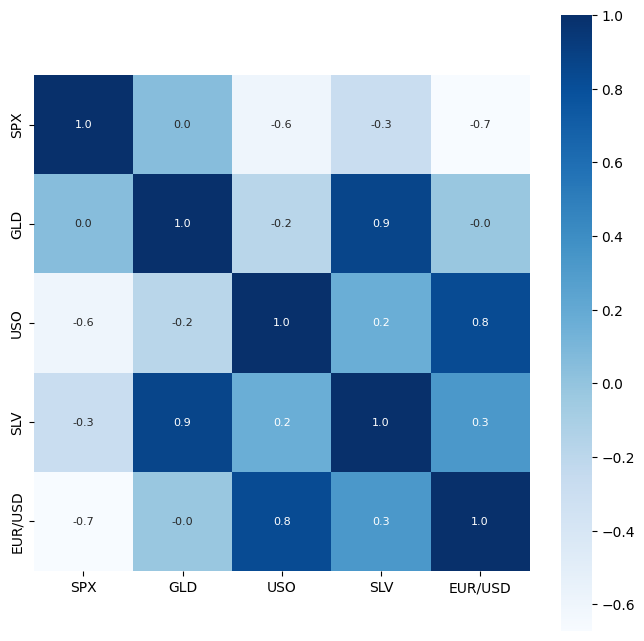

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

positive correlation : Positive correlation is a statistical relationship between two variables where an increase in one variable tends to be associated with an increase in the other variable

In [ ]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [ ]:
X = df.drop(['GLD'],axis=1)
Y = df['GLD']

complexity of the dataset depends on various factor like number of feature , Data Volume, Data Quality, Relationship and pattern



In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_standardized = scaler.transform(X_train)
print(X_train_standardized)

[[-0.98462976  0.40800594 -0.45358541  0.58865226]
 [ 1.06599085 -1.10546089 -0.60775875 -1.69473821]
 [-1.82781083 -0.38661608 -1.03633275 -0.21860468]
 ...
 [-0.70024302  0.3467614   1.03157202  0.55478557]
 [-0.36162586  0.10334014  1.28475614  0.16734672]
 [ 0.8530957  -0.69699095 -0.63604747 -1.74527372]]


In [ ]:
X_test_standardized = scaler.transform(X_test)

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.46179948  82.04329971 116.32170029 127.66280068 120.79010076
 154.67649735 150.49359919 126.18210029 117.47719869 126.03690052
 116.82070069 172.58640092 141.29319783 167.87069909 115.1528004
 117.82610058 137.48410401 170.02800071 159.38390313 157.77889941
 154.9402003  125.12550031 175.96540005 157.04750324 125.16530028
  93.74489974  77.58820006 120.43720016 119.03059944 167.59649945
  88.06549992 125.31550012  91.19240041 117.77840024 121.0486994
 136.94660055 115.41450131 115.20800056 150.0393994  107.22850113
 104.78960239  87.22629793 126.47490063 117.84439987 150.93199923
 119.56590014 108.21750011 108.05449844  93.23920089 126.89609837
  74.7323002  113.62779894 121.19240014 111.31209886 118.90889875
 120.56859929 159.13020012 166.43290099 147.02579698  85.92079865
  94.42210023  86.73349866  90.43690039 118.98770068 126.41930074
 127.5475002  169.61390009 122.34819939 117.30769916  98.39910029
 168.13500067 142.63959831 132.09920265 121.24290223 120.79899955
 119.6879005

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9885639299847145


In [ ]:
Y_test = list(Y_test)
print(Y_test)

[168.020004, 81.230003, 112.32, 127.589996, 119.620003, 154.210007, 148.910004, 126.190002, 117.470001, 125.739998, 115.379997, 167.119995, 141.630005, 169.559998, 115.599998, 119.669998, 132.949997, 170.399994, 159.369995, 173.529999, 154.720001, 128.119995, 177.720001, 157.190002, 125.309998, 93.400002, 76.790001, 119.690002, 118.989998, 167.389999, 87.5, 124.980003, 91.230003, 115.489998, 120.949997, 133.809998, 116.690002, 113.809998, 133.580002, 105.970001, 105.120003, 87.959999, 126.82, 116.860001, 159.259995, 119.459999, 109.160004, 108.620003, 93.269997, 127.160004, 72.260002, 113.470001, 119.68, 109.139999, 119.309998, 120.050003, 159.889999, 161.490005, 146.740005, 85.809998, 93.709999, 85.550003, 91.029999, 118.489998, 126.449997, 126.980003, 171.699997, 122.400002, 116.410004, 97.959999, 169.630005, 142.639999, 131.809998, 121.360001, 124.0, 119.699997, 113.889999, 118.919998, 105.639999, 127.669998, 114.32, 107.309998, 114.82, 119.230003, 86.860001, 87.010002, 147.729996, 

plt.legend(): This line of code is calling a function called legend() provided by the plt (matplotlib.pyplot) library. The legend() function is used to add a legend to the plot.

Legend: A legend is a small box or area within the plot that describes the elements of the plot. For example, if you have multiple lines or different data series plotted on the same graph, the legend helps to identify what each line or data series represents.

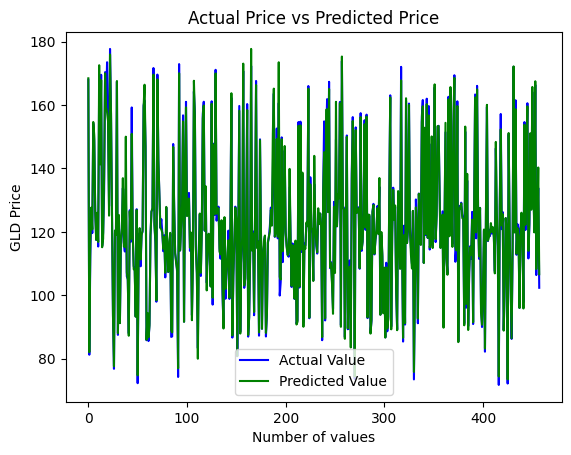

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [ ]:
# train model for linear regression
model = LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(predictions)

[159.45290968  81.50858067 113.4868037  128.55153817 126.20403783
 141.31818338 165.49416492 124.44197659 113.95389904 122.9965895
 113.95492464 174.89529849 132.66890174 159.24793304 118.8791679
 122.14315717 150.37153054 161.27175405 152.2792036  162.19946709
 145.88372183 118.07669395 180.21729122 178.13331554 123.51701986
  98.82914322  76.63486248 119.38435511 113.85027665 159.25706609
  93.76037617 120.05334649  88.61086583 114.28801659 112.77954274
 144.19518102 118.78252489 115.87334354 144.06409553 113.81864246
 100.49676727  89.42842238 120.36720699 110.47635305 146.4894628
 119.30321261 110.99311348 111.3386287   96.48139076 123.40842816
  79.51413425 115.36111603 121.78896764 114.55367722 120.9074622
 117.10612464 152.31198525 182.7735091  196.73570503  91.06670951
 101.92097594  87.48443506  94.33158785 119.17357764 121.8935122
 125.85678089 163.2699701  122.91100556 113.55098736 104.06905043
 155.16775229 176.87972077 125.62460858 113.85896766 119.69577146
 120.03159609 1

In [ ]:
error2 = metrics.r2_score(Y_test, predictions)
print("R squared error : ", error2)

R squared error :  0.8657886565869237


In [ ]:
X_test.head()

,SPX,USO,SLV,EUR/USD
903,1351.949951,38.330002,32.900002,1.324854
129,1271.510010,93.900002,13.450000,1.472581
1787,1880.050049,8.910000,14.340000,1.119996
1913,2181.300049,10.960000,18.620001,1.127142
2048,2352.949951,10.680000,17.320000,1.067247


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

n_estimators=100: This parameter specifies the number of trees (individual models) that will be used in the gradient boosting process. In this case, n_estimators=100 means that the algorithm will create 100 trees.

learning_rate=0.1: The learning rate controls the contribution of each tree in the model. A lower learning rate makes the model more robust by slowing down the learning process, preventing overfitting. Here, learning_rate=0.1 means that each tree's contribution to the model will be relatively conservative.

max_depth=3: This parameter determines the maximum depth of each individual tree in the model. The depth of a tree represents how many splits it can make before reaching a prediction. A lower max_depth helps prevent overfitting. Here, max_depth=3 means that each tree can have a maximum depth of 3 levels.

In [ ]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


Gradient Boosting: Gradient boosting is a specific type of boosting algorithm that works by combining multiple decision trees sequentially. Each new tree tries to correct the errors made by the previous trees. It's like having a team of people working on a task, where each person learns from the mistakes of the previous person and improves upon it.

In [ ]:
gb_regressor.fit(X_train, Y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
pred = gb_regressor.predict(X_test)

In [ ]:
error3 = metrics.r2_score(Y_test, pred)
print("R squared error : ", error3)

R squared error :  0.9764535924638388


randomforestregressor: # R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)
output: R squared error :  0.989023003473952

linear regressor : R squared error  output =:  0.8657886565869237

GradientBoostRegressor : Output : 0.9764535924638388

In [ ]:
pip install pmdarima

In [ ]:
data = pd.read_csv('Untitled spreadsheet - Untitled spreadsheet - final_dataset - gld_price_data - Untitled spreadsheet - Untitled spreadsheet - final_dataset - gld_price_data.csv')

In [ ]:
print(data)

           Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2013  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2013  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2013  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2013  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2013  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2023  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2023  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2023  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2023  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2023  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]


In [ ]:
new_data = data.drop(['SPX', 'USO', 'SLV', 'EUR/USD'], axis=1)

In [ ]:
print(new_data)

           Date         GLD
0      1/2/2013   84.860001
1      1/3/2013   85.570000
2      1/4/2013   85.129997
3      1/7/2013   84.769997
4      1/8/2013   86.779999
...         ...         ...
2285   5/8/2023  124.589996
2286   5/9/2023  124.330002
2287  5/10/2023  125.180000
2288  5/14/2023  124.489998
2289  5/16/2023  122.543800

[2290 rows x 2 columns]


In [ ]:
new_data.isnull().sum()

Date    0
GLD     0
dtype: int64

In [ ]:
new_data.set_index('Date', inplace=True)

In [ ]:
new_data.head()

,GLD
Date,
1/2/2013,84.860001
1/3/2013,85.570000
1/4/2013,85.129997
1/7/2013,84.769997
1/8/2013,86.779999


In [ ]:
new_data.describe()

,GLD
count,2290.000000
mean,122.732875
std,23.283346
min,70.000000
25%,109.725000
50%,120.580002
75%,132.840004
max,184.589996


<Axes: xlabel='Date'>

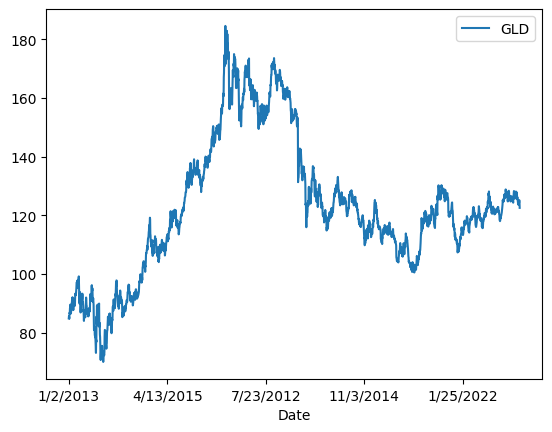

In [ ]:
new_data.plot()

Not necessarily. Whether Random Forest regression is better than ARIMA depends on various factors such as the nature of the data, the specific forecasting task, the desired interpretability of the model, and the accuracy required for predictions. Here are some key points to consider:

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

Augmented Dickey-Fuller (ADF) Test: The ADF test is used to determine whether a time series is stationary or not. Stationarity is an important concept in time series analysis, indicating that the statistical properties of the time series (like mean and variance) remain constant over time.

In [ ]:
test_result=adfuller(new_data['GLD'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(GLD):
    result=adfuller(GLD)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(new_data['GLD'])

ADF Test Statistic : -1.6188844282199604
p-value : 0.4733141978661497
#Lags Used : 27
Number of Observations Used : 2262
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
new_data['GLD First Difference'] = new_data['GLD'] - new_data['GLD'].shift(1)

In [ ]:
new_data['Seasonal First Difference']= new_data['GLD']- new_data['GLD'].shift(12)

In [ ]:
new_data.head(14)

,GLD,GLD First Difference,Seasonal First Difference
Date,,,
1/2/2013,84.860001,NaN,NaN
1/3/2013,85.570000,0.709999,NaN
1/4/2013,85.129997,-0.440003,NaN
1/7/2013,84.769997,-0.360000,NaN
1/8/2013,86.779999,2.010002,NaN
1/9/2013,86.550003,-0.229996,NaN
1/10/2013,88.250000,1.699997,NaN
1/11/2013,88.580002,0.330002,NaN
1/14/2013,89.540001,0.959999,NaN


In [ ]:
adfuller_test(new_data['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.293977264318974
p-value : 1.3934772452199808e-10
#Lags Used : 26
Number of Observations Used : 2251
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

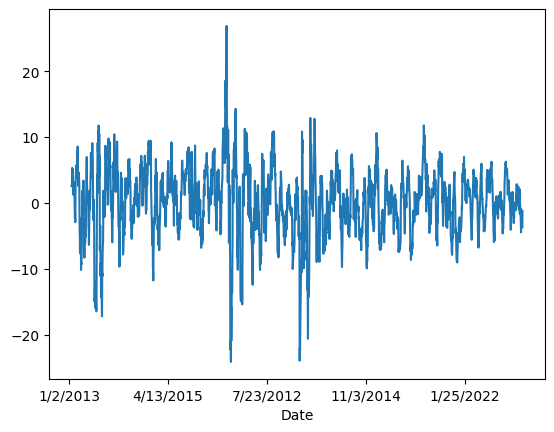

In [ ]:
new_data['Seasonal First Difference'].plot()

Auto Regressive Model
image.png

In [ ]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

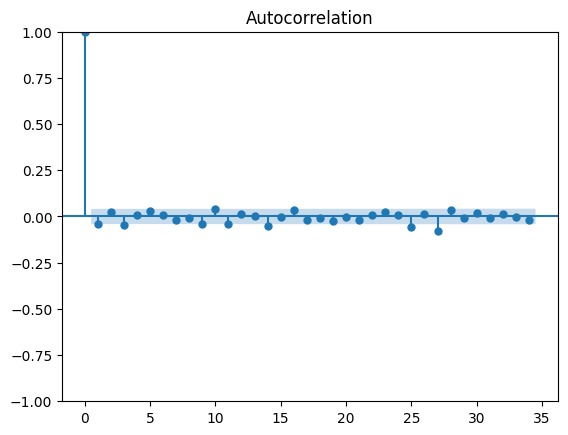

In [ ]:
acf = plot_acf(new_data["GLD First Difference"].dropna())

In [ ]:
#sometimes it works in sarimax instead of arima model

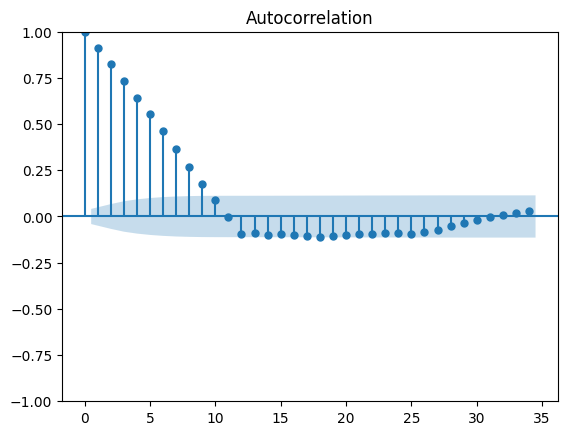

In [ ]:
acf = plot_acf(new_data["Seasonal First Difference"].dropna())


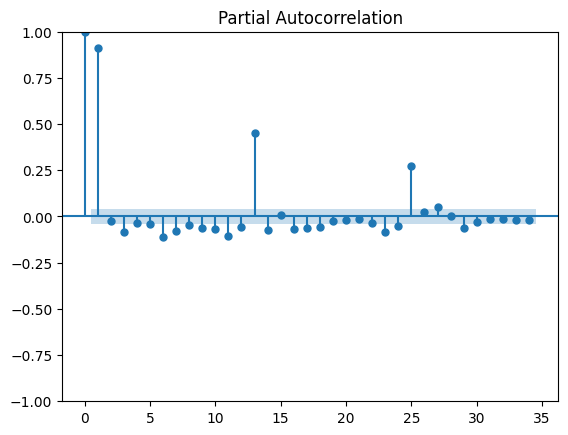

In [ ]:
pacf12 = plot_pacf(new_data["Seasonal First Difference"].dropna())


In [ ]:
new_data

,GLD,GLD First Difference,Seasonal First Difference
Date,,,
1/2/2013,84.860001,NaN,NaN
1/3/2013,85.570000,0.709999,NaN
1/4/2013,85.129997,-0.440003,NaN
1/7/2013,84.769997,-0.360000,NaN
1/8/2013,86.779999,2.010002,NaN
...,...,...,...
5/8/2023,124.589996,0.019996,-3.160004
5/9/2023,124.330002,-0.259994,-3.519996
5/10/2023,125.180000,0.849998,-2.419998


In [ ]:
# from datetime import datetime, timedelta
# train_dataset_end = datetime(2023,5,16)
# test_dataset_end = datetime(2025,5,16)
new_data.index = pd.to_datetime(new_data.index, format='%m/%d/%Y', errors='coerce')

fixed_split_date = datetime(2018, 1, 1)

train_data_fixed = new_data[new_data.index <= fixed_split_date]
test_data_fixed = new_data[new_data.index > fixed_split_date]



pred_start_date = test_data_fixed.index[0]
pred_end_date = test_data_fixed.index[-1]

In [ ]:
test_data_fixed

,GLD,GLD First Difference,Seasonal First Difference
Date,,,
2022-01-03,110.470001,0.860000,1.639999
2022-01-04,110.860001,0.390000,3.520005
2022-01-05,112.580002,1.720001,4.529999
2022-01-06,111.750000,-0.830002,3.160004
2022-01-09,112.669998,0.919998,4.879997
...,...,...,...
2023-05-08,124.589996,0.019996,-3.160004
2023-05-09,124.330002,-0.259994,-3.519996
2023-05-10,125.180000,0.849998,-2.419998


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
train_data_fixed

,GLD,GLD First Difference,Seasonal First Difference
Date,,,
2013-01-02,84.860001,NaN,NaN
2013-01-03,85.570000,0.709999,NaN
2013-01-04,85.129997,-0.440003,NaN
2013-01-07,84.769997,-0.360000,NaN
2013-01-08,86.779999,2.010002,NaN
...,...,...,...
2016-12-23,107.930000,0.340004,-3.900002
2016-12-27,108.559998,0.629998,-3.010002
2016-12-28,108.860001,0.300003,-1.540001


In [ ]:
model_ARIMA = ARIMA(train_data_fixed['GLD'], order=(10, 2, 4))

C:\Users\vaish\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vaish\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vaish\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vaish\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

In [ ]:
model_Arima_fit = model_ARIMA.fit()

C:\Users\vaish\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\vaish\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\vaish\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    GLD   No. Observations:                 1984
Model:                ARIMA(10, 2, 4)   Log Likelihood               -3758.263
Date:                Sun, 12 May 2024   AIC                           7546.526
Time:                        18:00:12   BIC                           7630.404
Sample:                             0   HQIC                          7577.338
                               - 1984                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8235      0.038    -48.300      0.000      -1.898      -1.750
ar.L2         -1.7743      0.063    -28.195      0.000      -1.898      -1.651
ar.L3         -0.9775      0.061    -15.938      0.000      -1.098      -0.857
ar.L4         -0.0745      0.054     -1.391      0.164      -0.179       0.030
ar.L5         -0.0253      0.055     -0.460      0.645      -0.133       0.082
ar.L6          0.0210      0.056      0.375      0.707      -0.089       0.131
ar.L7          0.0502      0.055      0.915      0.360      -0.057       0.158
ar.L8          0.0006      0.052      0.011      0.991      -0.101       0.102
ar.L9         -0.0575      0.040     -1.441      0.150      -0.136       0.021
ar.L10        -0.0225      0.020     -1.107      0.269      -0.062       0.017
ma.L1          0.7951      0.037     21.227      0.000       0.722       0.868
ma.L2         -0.0501      0.040     -1.265      0.206      -0.128       0.028
ma.L3         -0.8243      0.039    -21.290      0.000      -0.900      -0.748
ma.L4         -0.9201      0.038    -24.225      0.000      -0.995      -0.846
sigma2         2.5877      0.054     47.690      0.000       2.481       2.694
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             17928.11
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                            -1.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
print(pred_start_date)
print(pred_end_date)

2022-01-03 00:00:00
2023-05-16 00:00:00


<Axes: ylabel='Density'>

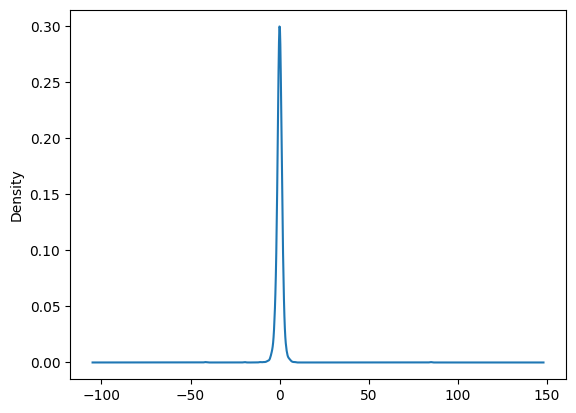

In [ ]:
model_Arima_fit.resid.plot(kind='kde')